# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
#Observations
# Temperatures seem higher at longitudes near 0
# Humidity seems evenly distributed
# Cloudiness seems evenly distributed

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | nanortalik
Processing Record 2 of Set 1 | ketchikan
Processing Record 3 of Set 1 | garowe
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | mahon
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | blackwater
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | hilo
City not found. Skipping...
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | turhal
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | naze
Processing Record 17 of Set 1 | gat
City not found. Skipping...
Processing Record 18 of Set 1 | lompoc
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | tautira
City not found. Skipping...
Processing Record 22 of Set 1 | ignalina
Processing Record 23 of Set 1 | t

Processing Record 35 of Set 4 | coihueco
Processing Record 36 of Set 4 | escanaba
Processing Record 37 of Set 4 | stavern
Processing Record 38 of Set 4 | meulaboh
Processing Record 39 of Set 4 | ust-ilimsk
Processing Record 40 of Set 4 | trinidad
Processing Record 41 of Set 4 | balgazyn
Processing Record 42 of Set 4 | puerto baquerizo moreno
Processing Record 43 of Set 4 | azle
City not found. Skipping...
Processing Record 44 of Set 4 | dicabisagan
Processing Record 45 of Set 4 | rayagada
Processing Record 46 of Set 4 | beyneu
Processing Record 47 of Set 4 | makaha
Processing Record 48 of Set 4 | mys shmidta
Processing Record 49 of Set 4 | darnah
Processing Record 1 of Set 5 | port macquarie
Processing Record 2 of Set 5 | camopi
City not found. Skipping...
Processing Record 3 of Set 5 | kaeo
Processing Record 4 of Set 5 | ola
Processing Record 5 of Set 5 | ust-maya
Processing Record 6 of Set 5 | tual
Processing Record 7 of Set 5 | derzhavinsk
Processing Record 8 of Set 5 | axim
Process

Processing Record 26 of Set 8 | ambilobe
Processing Record 27 of Set 8 | tokat
Processing Record 28 of Set 8 | plerin
Processing Record 29 of Set 8 | marsabit
City not found. Skipping...
Processing Record 30 of Set 8 | pangai
Processing Record 31 of Set 8 | zyryanovsk
Processing Record 32 of Set 8 | husavik
Processing Record 33 of Set 8 | bukama
Processing Record 34 of Set 8 | biak
Processing Record 35 of Set 8 | bintulu
Processing Record 36 of Set 8 | guerrero negro
Processing Record 37 of Set 8 | emba
Processing Record 38 of Set 8 | high level
Processing Record 39 of Set 8 | north bend
Processing Record 40 of Set 8 | kathmandu
City not found. Skipping...
Processing Record 41 of Set 8 | sioux lookout
Processing Record 42 of Set 8 | ayan
Processing Record 43 of Set 8 | svetlaya
Processing Record 44 of Set 8 | santa vitoria do palmar
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 45 of Set 8 | hoshcha
Processing Record 46 of Set 8 |

Processing Record 9 of Set 12 | luderitz
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [25]:
weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.to_csv('data_file')
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nanortalik,0,GL,1569453746,83,60.14,-45.24,41.61,0.74
1,ketchikan,90,US,1569453746,93,55.34,-131.65,51.80,8.05
2,garowe,53,SO,1569453747,61,8.41,48.48,77.14,28.54
3,jamestown,0,AU,1569453747,33,-33.21,138.60,67.05,7.78
4,mahon,20,IE,1569453747,93,51.89,-8.40,55.40,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

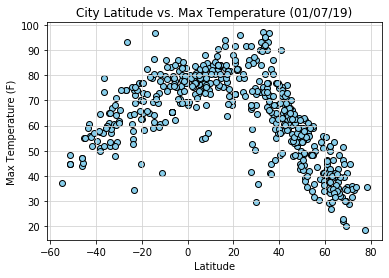

In [19]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../Images/fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

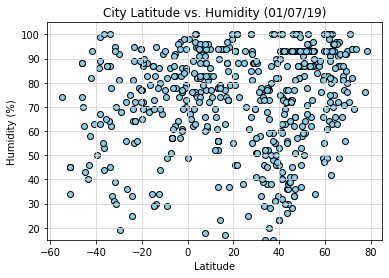

In [21]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../Images/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

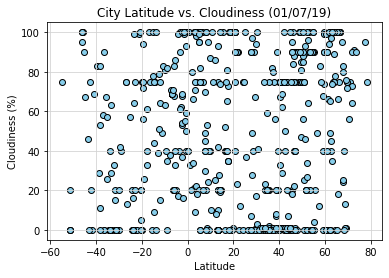

In [22]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../Images/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

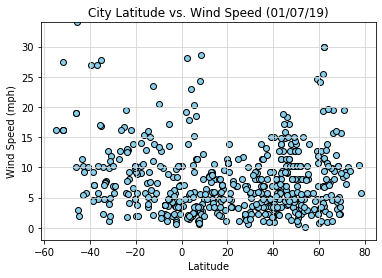

In [23]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../Images/fig4.png")
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


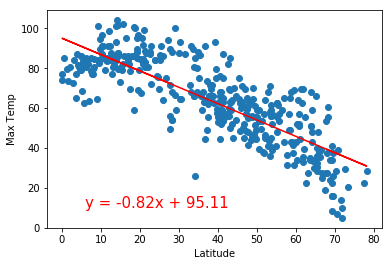

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


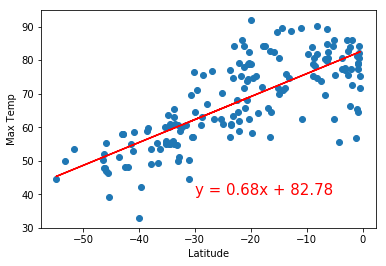

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


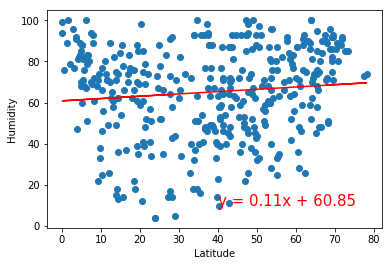

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


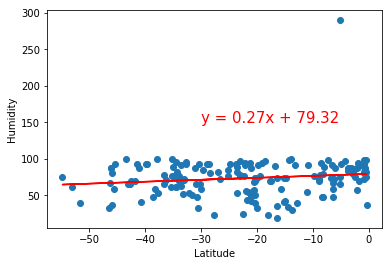

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


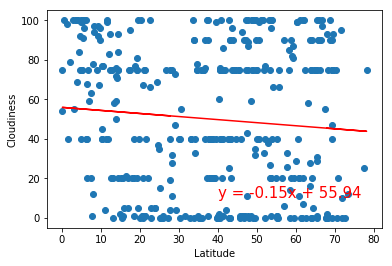

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


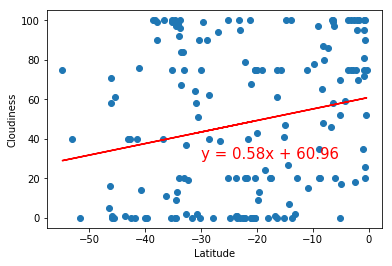

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


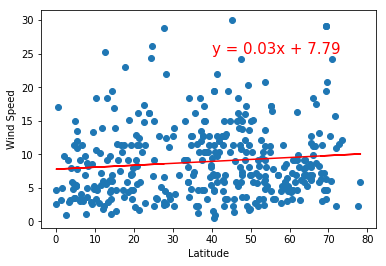

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


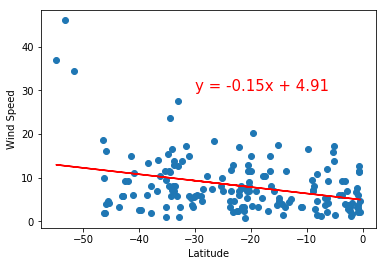